## Memory Data from 6th Nov 2015 to 15th Nov 2015

In [1]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

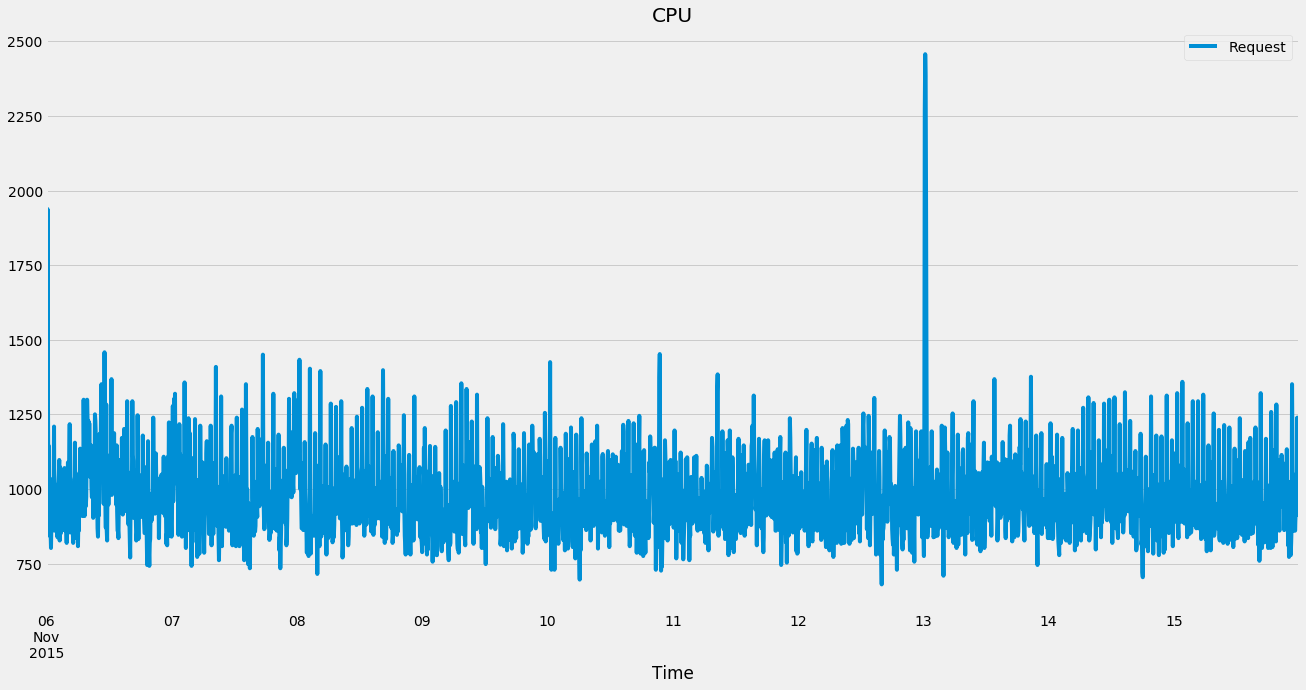

In [2]:
#Plot Data
data_plot = pd.read_csv('DATASETMEMORY_NEW.csv')
data_plot.columns = ['Time','Request']
data_plot['Time'] = pd.to_datetime(data_plot['Time'], format='%d.%m.%Y %H:%M:%S')
data_plot = data_plot.set_index('Time')
data_plot.plot(figsize=(20, 10))
plt.legend(loc='best')
plt.title('CPU')
plt.show(block=False)

In [3]:
# Import data from and in DataFram
data = pd.read_csv('DATASETMEMORY_NEW.csv')
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,1081
1,933
2,991
3,1938
4,1305


In [4]:
#ADF to chek the series Stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -8.993651
No of Lags: 28.000000
No of Observations: 2851.000000
Critical Values @ 0.05: -2.86
p-value: 0.000000


with the above p-value we can say, series is Stationarity.

<Figure size 432x288 with 0 Axes>

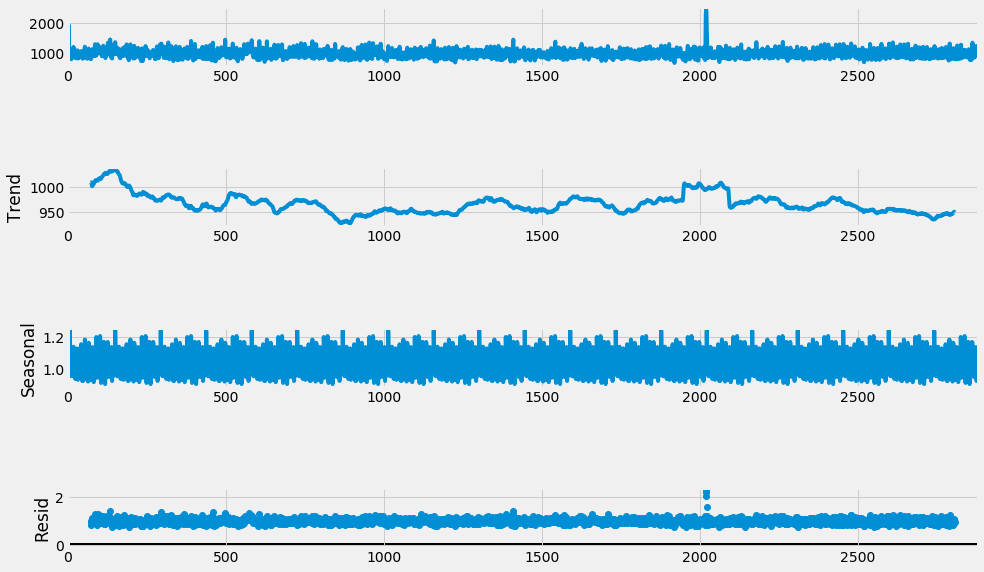

In [5]:
# Decompose the Series
result = seasonal_decompose(data, model='multiplicative', freq = 144)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [6]:
# As Series have Varience so rescale on Log
df_log = np.log(data)

In [7]:
# Train test Split 1st time from 6th Nov 2015 to 10th Nov 2015 as Train and 11th Nov 2015 as Test
train_data1 = df_log[0:1440] 
test_data1 = df_log[1440:1728]
print(train_data1.tail())
print(test_data1.tail())

       Request
1435  7.000334
1436  6.861711
1437  6.817831
1438  6.821107
1439  6.890609
       Request
1723  7.008505
1724  6.673298
1725  6.771936
1726  6.663133
1727  6.666957


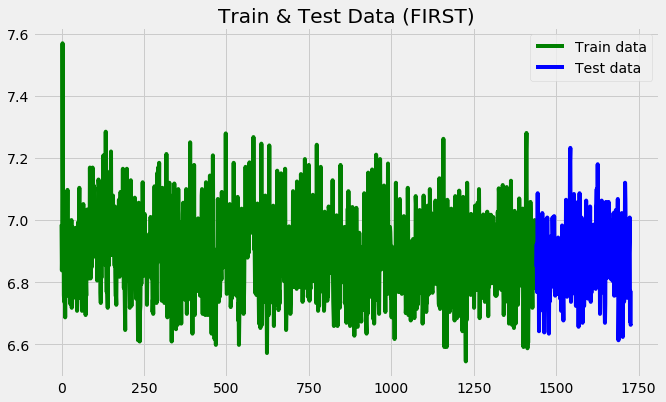

In [8]:
# Plot Train & Test Data for - FIRST
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data1, 'green', label='Train data')
plt.plot(test_data1, 'blue', label='Test data')
plt.title('Train & Test Data (FIRST)')
plt.legend()

In [9]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FIRST
y_hat_hwm1 = test_data1.copy()
model1 = ExponentialSmoothing(np.asarray(train_data1) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit1 = model1.fit(optimized=True)
print(model_fit1.params)
y_hat_hwm1['hw_forecast'] = model_fit1.forecast(288)
res1 = model_fit1.resid
#print(model_fit9.summary())

{'smoothing_level': 0.18964668651245306, 'smoothing_slope': 2.3506185531400867e-10, 'smoothing_seasonal': 1.1007599050688577e-07, 'damping_slope': nan, 'initial_level': 6.862593508217015, 'initial_slope': 0.0, 'initial_seasons': array([1.00707314, 1.01118999, 1.01665096, 1.03446842, 1.01773802,
       1.01874899, 1.05344875, 1.02075572, 1.00928931, 1.0165075 ,
       1.01097919, 1.00604328, 1.00490258, 1.01044182, 1.00860995,
       1.01423634, 1.00610248, 1.01376646, 1.04376422, 1.01302461,
       1.00415642, 1.01027869, 1.00276227, 1.00139901, 1.00300949,
       1.00774306, 1.00959148, 1.01649801, 1.01115771, 1.00791386,
       1.04385314, 1.01564469, 0.99871509, 1.0020507 , 1.0080693 ,
       1.01128619, 1.00336286, 1.00518113, 1.00463983, 1.01291103,
       1.0036339 , 1.00993487, 1.04186484, 1.01699806, 0.99900062,
       0.99817604, 0.9992022 , 1.00003701, 1.00175695, 1.01381413,
       1.0167245 , 1.00799804, 1.00316517, 1.00889572, 1.04931178,
       1.01548302, 1.00552902, 1.0

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


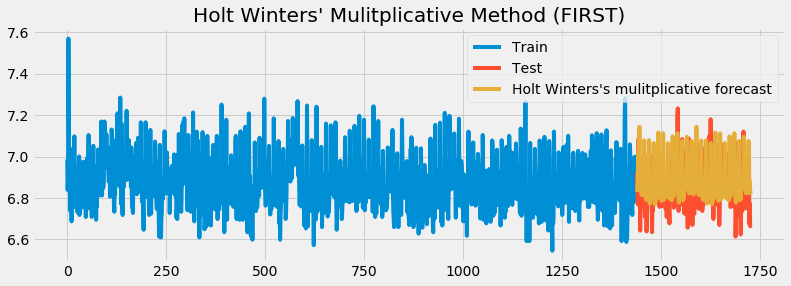

In [10]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FIRST
plt.figure(figsize=(12,4))
plt.plot( train_data1, label='Train')
plt.plot(test_data1, label='Test')
plt.plot(y_hat_hwm1['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FIRST)')
plt.show()

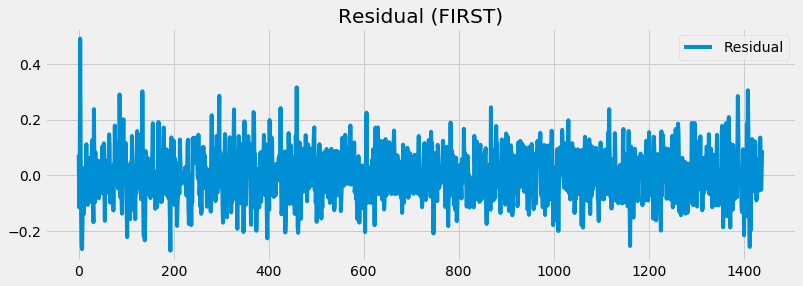

In [11]:
# Plot Residual - FIRST
plt.figure(figsize=(12,4))
plt.plot( res1, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FIRST)')
plt.show()

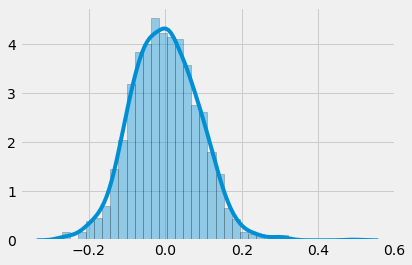

In [12]:
# Plot Residual Density Distribution - FIRST
sns.distplot(res1, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [13]:
# ljungbox test - FIRST
print(sm.stats.acorr_ljungbox(res1, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  76.815374  1.877106e-18


In [14]:
# Report performance after train, test & Predict - FIRST

mse = mean_squared_error(test_data1, y_hat_hwm1['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data1, y_hat_hwm1['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data1, y_hat_hwm1['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data1['Request']- y_hat_hwm1['hw_forecast'])/test_data1['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data1['Request']- y_hat_hwm1['hw_forecast']/np.abs(test_data1['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data1['Request']- y_hat_hwm1['hw_forecast'])
print('ME: '+str(me))

MSE: 0.009713277722784137
MAE: 0.08130515256061271
RMSE: 0.0985559623908373
MAPE: 1.182808631434954
MPE: -93.20938634014699
ME: -0.003977967659971681


In [15]:
# Train test Split 2nd time from 7th Nov 2015 to 11th Nov 2015 as Train and 12th Nov 2015 as Test
train_data2 = df_log[288:1728] 
test_data2 = df_log[1728:2016] 
print(train_data2.tail())
print(test_data2.tail())

       Request
1723  7.008505
1724  6.673298
1725  6.771936
1726  6.663133
1727  6.666957
       Request
2011  7.084226
2012  6.873164
2013  6.731018
2014  6.833032
2015  6.838405


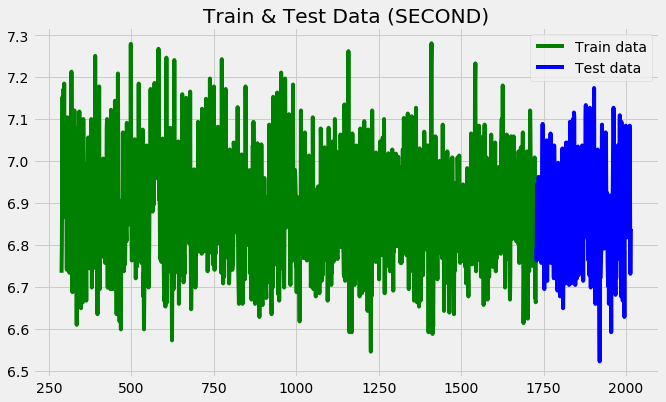

In [16]:
# Plot Train Test Data for - SECOND
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data2, 'green', label='Train data')
plt.plot(test_data2, 'blue', label='Test data')
plt.title('Train & Test Data (SECOND)')
plt.legend()

In [17]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - SECOND
y_hat_hwm2 = test_data2.copy()
model2 = ExponentialSmoothing(np.asarray(train_data2) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit2 = model2.fit(optimized=True)
print(model_fit2.params)
y_hat_hwm2['hw_forecast'] = model_fit2.forecast(288)
res2 = model_fit2.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.159546068176666, 'smoothing_slope': 1.466368639102598e-14, 'smoothing_seasonal': 6.674821405953312e-10, 'damping_slope': nan, 'initial_level': 6.8435849003836, 'initial_slope': 5.8499284525809354e-15, 'initial_seasons': array([1.00330856, 1.00984662, 1.01441944, 1.02215942, 1.01697227,
       1.01675605, 1.05025842, 1.027094  , 1.00835985, 1.01263945,
       1.01108782, 1.00638758, 1.0012531 , 1.015657  , 1.00801809,
       1.01301441, 1.00500017, 1.01369324, 1.0423405 , 1.019611  ,
       1.00594574, 1.01274081, 1.00505351, 1.00056589, 0.99966486,
       1.00542878, 1.01086794, 1.01731614, 1.0098812 , 1.00657775,
       1.04401611, 1.02060945, 0.99901188, 1.0070827 , 1.01091949,
       1.00758662, 1.00347833, 1.00923791, 1.00615312, 1.01518056,
       1.00595259, 1.01123926, 1.04300286, 1.01989829, 1.00268181,
       1.0013966 , 1.00009686, 1.00541545, 1.0074796 , 1.01757117,
       1.01767837, 1.00834792, 1.00382209, 1.01014107, 1.04787313,
       1.01863264, 1.

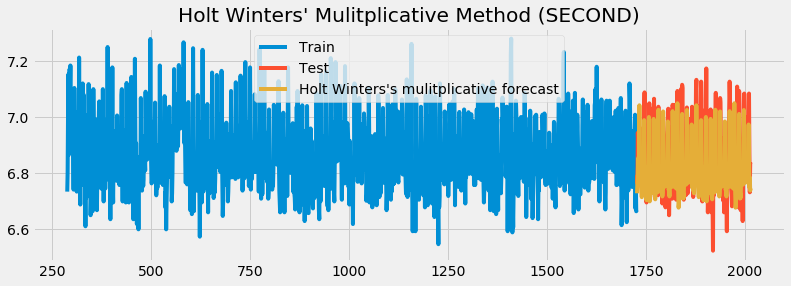

In [18]:
# Plot Holt Winter's multiplicative method with trend and seasonality - SECOND
plt.figure(figsize=(12,4))
plt.plot( train_data2, label='Train')
plt.plot(test_data2, label='Test')
plt.plot(y_hat_hwm2['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (SECOND)')
plt.show()

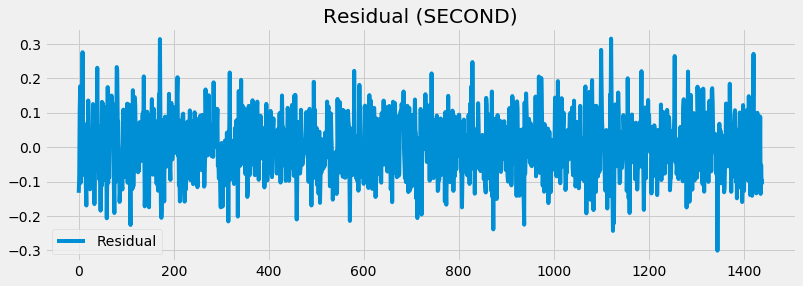

In [19]:
# Plot Residual - SECOND
plt.figure(figsize=(12,4))
plt.plot( res2, label='Residual')
plt.legend(loc='best')
plt.title('Residual (SECOND)')
plt.show()

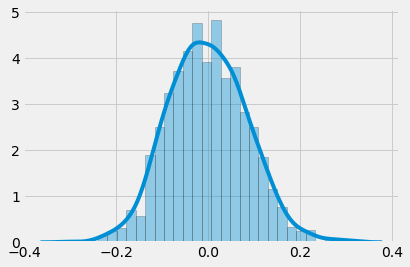

In [20]:
# Plot Residual Density Distribution - SECOND
sns.distplot(res2, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [21]:
# ljungbox test - SECOND
print(sm.stats.acorr_ljungbox(res2, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  63.152757  1.912816e-15


In [22]:
# Report performance after train, test & Predict - SECOND

mse = mean_squared_error(test_data2, y_hat_hwm2['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data2, y_hat_hwm2['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data2, y_hat_hwm2['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data2['Request']- y_hat_hwm2['hw_forecast'])/test_data2['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data2['Request']- y_hat_hwm2['hw_forecast']/np.abs(test_data2['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data2['Request']- y_hat_hwm2['hw_forecast'])
print('ME: '+str(me))

MSE: 0.015128076444008801
MAE: 0.09867526331609637
RMSE: 0.12299624565005551
MAPE: 1.4268886428540732
MPE: -92.13722605069424
ME: 0.06976936661413491


In [23]:
# Train test Split 3nd time from 8th Nov 2015 to 12th Nov 2015 as Train and 13th Nov 2015 as Test
train_data3 = df_log[576:2016] 
test_data3 = df_log[2016:2304] 
print(train_data3.tail())
print(test_data3.tail())

       Request
2011  7.084226
2012  6.873164
2013  6.731018
2014  6.833032
2015  6.838405
       Request
2299  6.987490
2300  6.768493
2301  6.794587
2302  6.727432
2303  6.985642


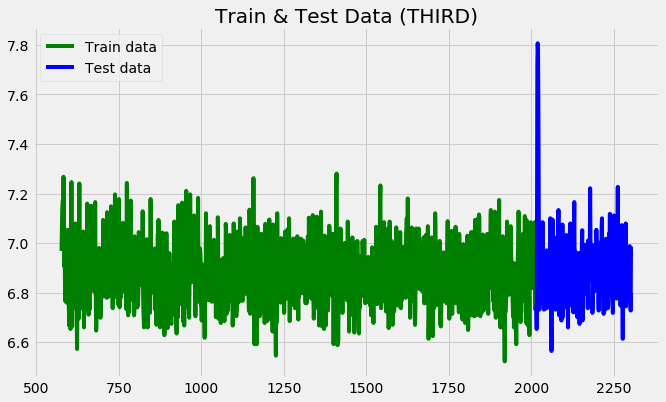

In [24]:
# Plot Train Test Data for - THIRD
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data3, 'green', label='Train data')
plt.plot(test_data3, 'blue', label='Test data')
plt.title('Train & Test Data (THIRD)')
plt.legend()

In [25]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - THIRD
y_hat_hwm3 = test_data3.copy()
model3 = ExponentialSmoothing(np.asarray(train_data3) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit3 = model3.fit(optimized=True)
print(model_fit3.params)
y_hat_hwm3['hw_forecast'] = model_fit3.forecast(288)
res3 = model_fit3.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.14607546738346863, 'smoothing_slope': 4.72637232960188e-10, 'smoothing_seasonal': 8.116663739794887e-08, 'damping_slope': nan, 'initial_level': 6.92570251310938, 'initial_slope': 0.0, 'initial_seasons': array([1.00489969, 1.01096809, 1.01199542, 1.01859711, 1.01852195,
       1.0163597 , 1.04564161, 1.02788738, 1.00608795, 1.01383907,
       1.00765446, 1.00430911, 1.00376007, 1.01667387, 1.00441234,
       1.01194799, 1.0058277 , 1.00876297, 1.04000887, 1.02371312,
       1.00336015, 1.00917732, 1.00633472, 1.00333122, 1.00271476,
       1.00481885, 1.00985435, 1.01224911, 1.00732905, 1.00823337,
       1.04054585, 1.02872519, 1.0013845 , 1.00797398, 1.01089278,
       1.00633284, 1.00298904, 1.01213436, 1.00860064, 1.01264537,
       1.00445653, 1.01322051, 1.03965201, 1.02355825, 1.00020954,
       1.00215316, 1.00172951, 1.0029258 , 1.00484593, 1.01714263,
       1.01496055, 1.00328425, 1.00212286, 1.00882705, 1.04392142,
       1.02194221, 1.00210637, 1.00627

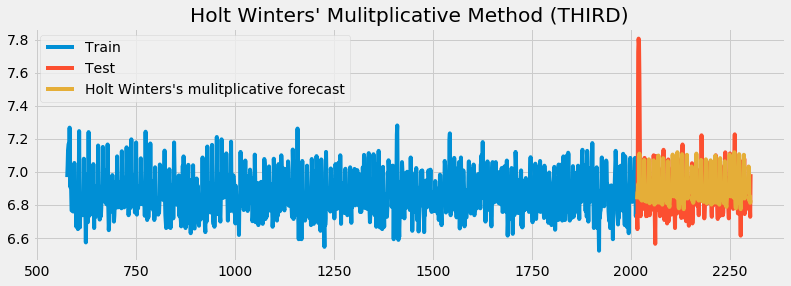

In [26]:
# Plot Holt Winter's multiplicative method with trend and seasonality - THIRD
plt.figure(figsize=(12,4))
plt.plot( train_data3, label='Train')
plt.plot(test_data3, label='Test')
plt.plot(y_hat_hwm3['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (THIRD)')
plt.show()

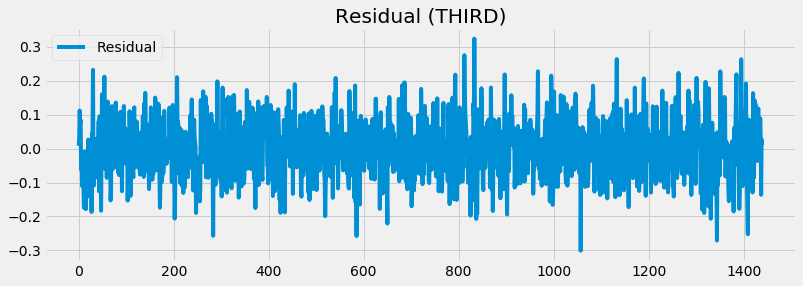

In [27]:
# Plot Residual - THIRD
plt.figure(figsize=(12,4))
plt.plot( res3, label='Residual')
plt.legend(loc='best')
plt.title('Residual (THIRD)')
plt.show()

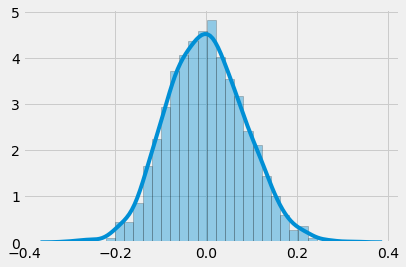

In [28]:
# Plot Residual Density Distribution - THIRD
sns.distplot(res3, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [29]:
# ljungbox test - THIRD
print(sm.stats.acorr_ljungbox(res3, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  48.716561  2.957584e-12


In [30]:
# Report performance after train, test & Predict - THIRD

mse = mean_squared_error(test_data3, y_hat_hwm3['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data3, y_hat_hwm3['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data3, y_hat_hwm3['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data3['Request']- y_hat_hwm3['hw_forecast'])/test_data3['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data3['Request']- y_hat_hwm3['hw_forecast']/np.abs(test_data3['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data3['Request']- y_hat_hwm3['hw_forecast'])
print('ME: '+str(me))

MSE: 0.01954414049821798
MAE: 0.09468653864717301
RMSE: 0.13980035943522456
MAPE: 1.3611615057135114
MPE: -93.23060883390824
ME: -0.005253315954280986


In [31]:
# Train test Split 2nd time from 9th Nov 2015 to 13th Nov 2015 as Train and 14th Nov 2015 as Test
train_data4 = df_log[864:2304] 
test_data4 = df_log[2304:2592] 
print(train_data3.tail())
print(test_data3.tail())

       Request
2011  7.084226
2012  6.873164
2013  6.731018
2014  6.833032
2015  6.838405
       Request
2299  6.987490
2300  6.768493
2301  6.794587
2302  6.727432
2303  6.985642


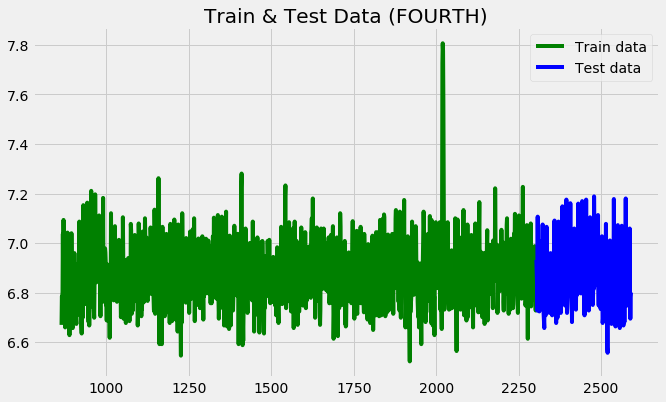

In [32]:
# Plot Train Test Data for - FOURTH
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data4, 'green', label='Train data')
plt.plot(test_data4, 'blue', label='Test data')
plt.title('Train & Test Data (FOURTH)')
plt.legend()

In [33]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FOURTH
y_hat_hwm4 = test_data4.copy()
model4 = ExponentialSmoothing(np.asarray(train_data4) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit4 = model4.fit(optimized=True)
print(model_fit4.params)
y_hat_hwm4['hw_forecast'] = model_fit4.forecast(288)
res4 = model_fit4.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.25031827598319, 'smoothing_slope': 1.5914010843282118e-14, 'smoothing_seasonal': 8.291349521035986e-10, 'damping_slope': nan, 'initial_level': 6.773608331661908, 'initial_slope': 6.005326708517837e-05, 'initial_seasons': array([0.99540188, 0.99836905, 1.00582646, 1.02155742, 1.02209901,
       1.02142722, 1.04070479, 1.02394005, 0.99696712, 1.00044885,
       0.99995269, 1.00214817, 0.99700545, 1.01156451, 0.99942065,
       1.00682603, 1.00427924, 1.00177173, 1.02700543, 1.02348153,
       0.99892505, 1.00478725, 1.00015133, 0.99940009, 0.99527099,
       1.00219653, 1.00050109, 1.00867023, 1.00245123, 1.00264392,
       1.02514363, 1.024923  , 0.99787109, 1.00273545, 1.0073748 ,
       1.0012384 , 0.99673464, 1.0079545 , 1.00655747, 1.01083426,
       1.00173692, 1.00952788, 1.03040943, 1.02264571, 0.99435334,
       0.99497418, 0.9933084 , 0.99943865, 0.99885598, 1.01377429,
       1.01220842, 0.9999527 , 1.00049084, 1.00028002, 1.02925551,
       1.01870118, 0

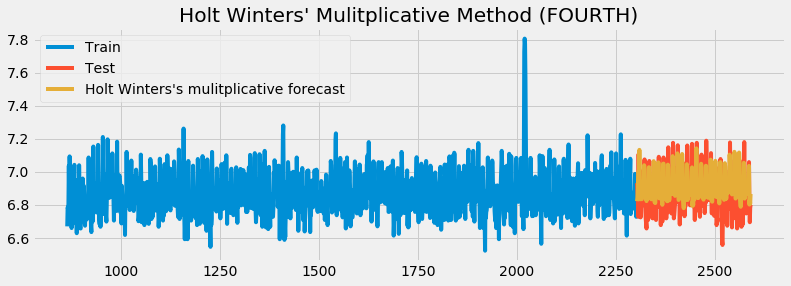

In [34]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FOURTH
plt.figure(figsize=(12,4))
plt.plot( train_data4, label='Train')
plt.plot(test_data4, label='Test')
plt.plot(y_hat_hwm4['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FOURTH)')
plt.show()

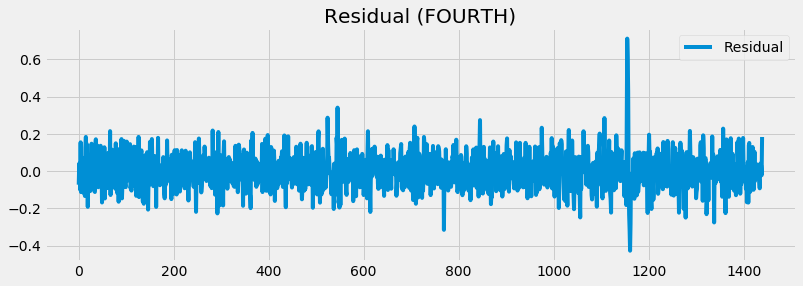

In [35]:
# Plot Residual - FOURTH
plt.figure(figsize=(12,4))
plt.plot( res4, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FOURTH)')
plt.show()

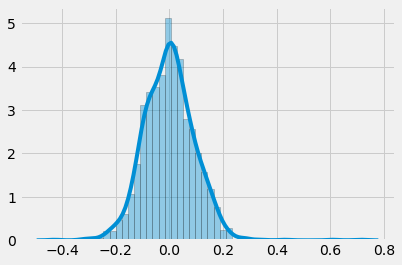

In [36]:
# Plot Residual Density Distribution - FOURTH
sns.distplot(res4, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [37]:
# ljungbox test - FOURTH
print(sm.stats.acorr_ljungbox(res4, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  52.548101  4.198385e-13


In [38]:
# Report performance after train, test & Predict - FOURTH

mse = mean_squared_error(test_data4, y_hat_hwm4['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data4, y_hat_hwm4['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data4, y_hat_hwm4['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data4['Request']- y_hat_hwm4['hw_forecast'])/test_data4['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data4['Request']- y_hat_hwm4['hw_forecast']/np.abs(test_data4['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data4['Request']- y_hat_hwm4['hw_forecast'])
print('ME: '+str(me))

MSE: 0.013172746730900329
MAE: 0.08941644337825085
RMSE: 0.11477258701841798
MAPE: 1.3095153296970492
MPE: -93.83592513508094
ME: -0.0463810658025657


In [39]:
# Train test Split 2nd time from 10th Nov 2015 to 14th Nov 2015 as Train and 15th Nov 2015 as Test
train_data5 = df_log[1152:2592] 
test_data5 = df_log[2592:2880] 
print(train_data5.tail())
print(test_data5.tail())

       Request
2587  7.058758
2588  6.794587
2589  6.694562
2590  6.781058
2591  6.800170
       Request
2875  7.122060
2876  6.911747
2877  6.884487
2878  6.858565
2879  6.809039


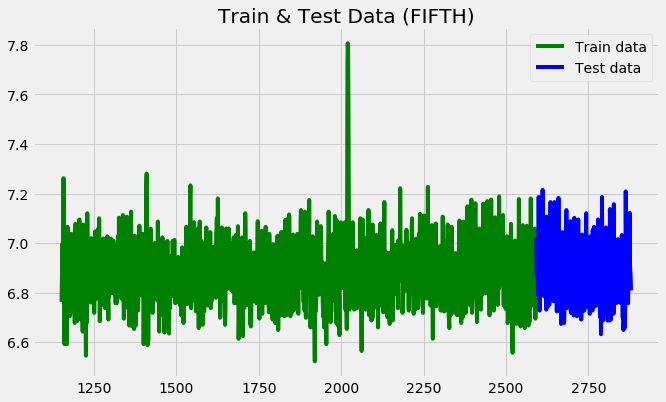

In [40]:
# Plot Train Test Data for - FIFTH
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data5, 'green', label='Train data')
plt.plot(test_data5, 'blue', label='Test data')
plt.title('Train & Test Data (FIFTH)')
plt.legend()

In [41]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FIFTH
y_hat_hwm5 = test_data5.copy()
model5 = ExponentialSmoothing(np.asarray(train_data5) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit5 = model5.fit(optimized=True)
print(model_fit5.params)
y_hat_hwm5['hw_forecast'] = model_fit5.forecast(288)
res5 = model_fit5.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.2256345029071849, 'smoothing_slope': 9.152967158021392e-13, 'smoothing_seasonal': 7.621606294295058e-10, 'damping_slope': nan, 'initial_level': 6.805422462041921, 'initial_slope': 6.427453443993325e-07, 'initial_seasons': array([0.99655841, 0.99882684, 1.00595294, 1.01853319, 1.02095915,
       1.01973255, 1.03128755, 1.02681852, 0.99731886, 0.9987995 ,
       0.99492393, 1.003753  , 0.99741139, 1.0155431 , 0.99660205,
       1.0021017 , 1.00148258, 0.99801296, 1.01904004, 1.0294647 ,
       0.99619669, 1.00250088, 0.99848749, 0.99428047, 0.99492841,
       1.0022245 , 0.99761827, 1.00403218, 0.99716173, 1.003711  ,
       1.01559921, 1.02742465, 0.99880489, 1.00292758, 1.00536014,
       0.99720615, 0.99459895, 1.00890924, 1.0043732 , 1.00831038,
       0.99737834, 1.00660055, 1.02200937, 1.02297487, 0.99629433,
       0.99417561, 0.99277526, 0.99547085, 0.9934888 , 1.01226647,
       1.00865816, 0.99814487, 0.99615886, 1.00367311, 1.02562309,
       1.02431508, 

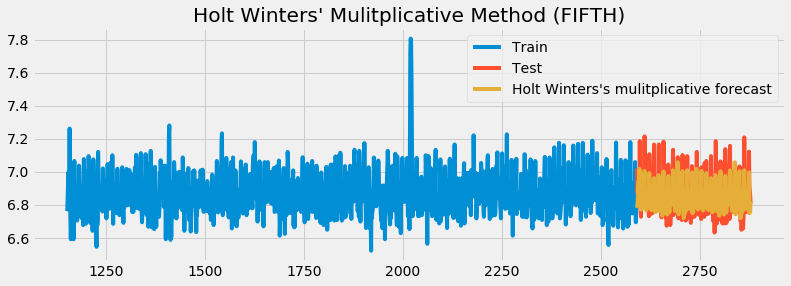

In [42]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FIFTH
plt.figure(figsize=(12,4))
plt.plot( train_data5, label='Train')
plt.plot(test_data5, label='Test')
plt.plot(y_hat_hwm5['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FIFTH)')
plt.show()

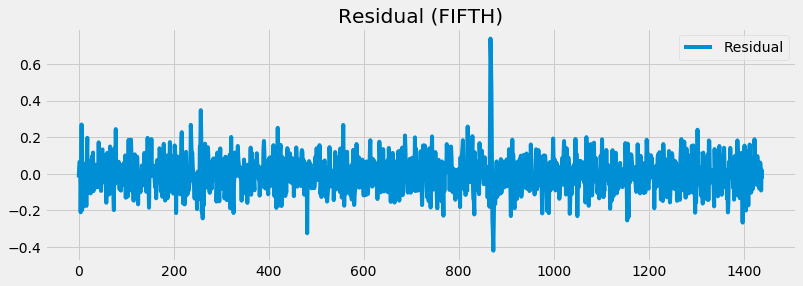

In [43]:
# Plot Residual - FIFTH
plt.figure(figsize=(12,4))
plt.plot( res5, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FIFTH)')
plt.show()

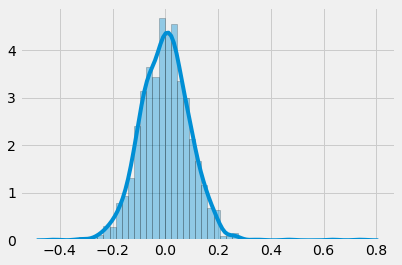

In [44]:
# Plot Residual Density Distribution - FIFTH
sns.distplot(res5, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [45]:
# ljungbox test - FIFTH
print(sm.stats.acorr_ljungbox(res5, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  75.889819  2.999425e-18


In [46]:
# Report performance after train, test & Predict - FIFTH

mse = mean_squared_error(test_data5, y_hat_hwm5['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data5, y_hat_hwm5['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data5, y_hat_hwm5['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data5['Request']- y_hat_hwm5['hw_forecast'])/test_data5['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data5['Request']- y_hat_hwm5['hw_forecast']/np.abs(test_data5['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data5['Request']- y_hat_hwm5['hw_forecast'])
print('ME: '+str(me))

MSE: 0.009993874078183588
MAE: 0.07967950662999496
RMSE: 0.09996936569861584
MAPE: 1.158265216832842
MPE: -92.90681054080795
ME: 0.017811798858251182


In [47]:
# Creating Final Predict Series from 11th Nov 2015 to 15th Nov 2015
Final_Pred_log = pd.concat([y_hat_hwm1, y_hat_hwm2, y_hat_hwm3, y_hat_hwm4, y_hat_hwm5]) 
print(Final_Pred_log.head())
print(Final_Pred_log.tail())

       Request  hw_forecast
1440  6.850126     6.829229
1441  6.922644     6.857146
1442  6.768493     6.894179
1443  6.890609     7.015004
1444  7.086738     6.901550
       Request  hw_forecast
2875  7.122060     6.996572
2876  6.911747     6.748852
2877  6.884487     6.764530
2878  6.858565     6.758313
2879  6.809039     6.819944


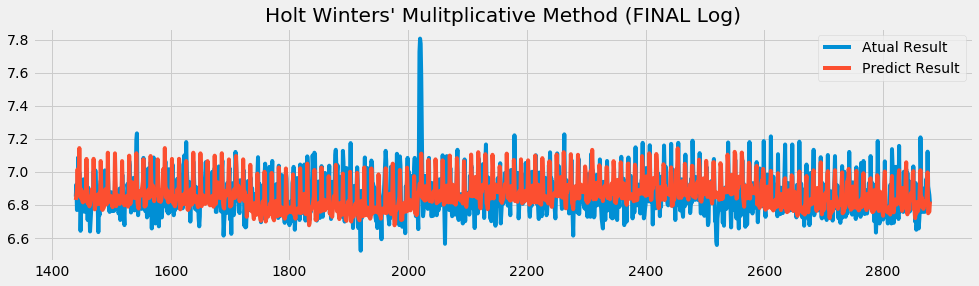

In [48]:
# Plot Final Log Series with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

plt.figure(figsize=(15,4))
plt.plot( Final_Pred_log['Request'], label='Atual Result')
plt.plot(Final_Pred_log['hw_forecast'], label='Predict Result')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FINAL Log)')
plt.show()

In [49]:
# Final performance report with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

mse = mean_squared_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((Final_Pred_log['Request']- Final_Pred_log['hw_forecast'])/Final_Pred_log['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((Final_Pred_log['Request']- Final_Pred_log['hw_forecast']/np.abs(Final_Pred_log['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(Final_Pred_log['Request']- Final_Pred_log['hw_forecast'])
print('ME: '+str(me))

MSE: 0.013510423094818967
MAE: 0.08875258090642558
RMSE: 0.11623434559035882
MAPE: 1.2877278653064856
MPE: -93.06399138012766
ME: 0.006393763211113532


In [50]:
# Creating final pridict data set and recover the original series
Final_Pred = np.round((np.exp(Final_Pred_log)),0)
Final_Pred = Final_Pred.astype(np.int64)
Final_Pred.head()

,Request,hw_forecast
1440,944,924
1441,1015,951
1442,870,987
1443,983,1113
1444,1196,994


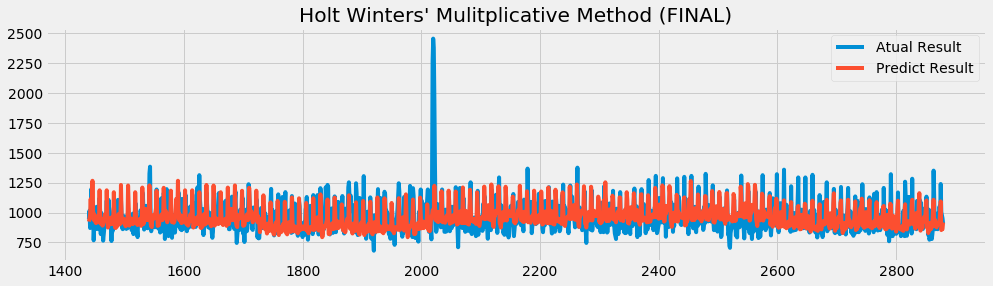

In [51]:
# Plot Final Series with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

plt.figure(figsize=(15,4))
plt.plot( Final_Pred['Request'], label='Atual Result')
plt.plot(Final_Pred['hw_forecast'], label='Predict Result')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FINAL)')
plt.show()

In [52]:
# Adding the Time column for better understanding
Final_Pred['Time']=Time.iloc[1440:]
Final_Pred.tail()

,Request,hw_forecast,Time
2875,1239,1093,2015-11-15 23:35:00
2876,1004,853,2015-11-15 23:40:00
2877,977,867,2015-11-15 23:45:00
2878,952,861,2015-11-15 23:50:00
2879,906,916,2015-11-15 23:55:00


In [53]:
# Export data in 'pridict_data_Memory_New.csv' 
Final_Pred.to_csv(r'C:\Users\Shraddhay\Downloads\New Project\pridict_data_Memory_New.csv', index = False)